# Minimal SHAP example - Regression Problem

In [89]:
import shap
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

from xgboost import XGBRegressor

# Import machine learning methods
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, \
                            r2_score, root_mean_squared_error

# Import shap for shapley values
import shap

# JavaScript Important for the interactive charts later on
shap.initjs()

From the SKLearn documentation:


Number of Instances: 442

Number of Attributes: First 10 columns are numeric predictive values

Target: Column 11 is a quantitative measure of disease progression one year after baseline

Attribute Information:

*age* age in years

*sex*

*bmi* body mass index

*bp* average blood pressure

*s1* tc, total serum cholesterol

*s2* ldl, low-density lipoproteins

*s3* hdl, high-density lipoproteins

*s4* tch, total cholesterol / HDL

*s5* ltg, possibly log of serum triglycerides level

*s6* glu, blood sugar level

https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times the square root of n_samples (i.e. the sum of squares of each column totals 1).
This isn't necessary given we've opted to use a tree model, but will be fine for the purpose of demonstration.

In [26]:
# Load the diabetes dataset
X, y = datasets.load_diabetes(return_X_y=True, as_frame=True, scaled=False)

X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,59.0,2.0,32.1,101.0,157.0,93.2,38.0,4.0,4.8598,87.0
1,48.0,1.0,21.6,87.0,183.0,103.2,70.0,3.0,3.8918,69.0
2,72.0,2.0,30.5,93.0,156.0,93.6,41.0,4.0,4.6728,85.0
3,24.0,1.0,25.3,84.0,198.0,131.4,40.0,5.0,4.8903,89.0
4,50.0,1.0,23.0,101.0,192.0,125.4,52.0,4.0,4.2905,80.0


In [27]:
# let's just rename these to be clearer based on the data dictionary

X = X.rename(columns=
         {
             "s1": "total_serum_cholesterol",
             "s2": "ldl_cholesterol",
             "s3": "hdl_cholesterol",
             "s4": "total_cholesterol",
             "s5": "serum_triglycerides_log",
             "s6": "blood_sugar"
         })

In [28]:
y.head()

0    151.0
1     75.0
2    141.0
3    206.0
4    135.0
Name: target, dtype: float64

In [29]:

# Split the data into training/testing sets
diabetes_X_train, diabetes_X_test, diabetes_y_train, diabetes_y_test = train_test_split(
    X, y,
    test_size = 0.25,
    random_state=42
    )

model = XGBRegressor(random_state=42)

# Train the model using the training sets
model.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = model.predict(diabetes_X_test)

print(f"Mean absolute error: {mean_absolute_error(diabetes_y_test, diabetes_y_pred):.2f}")


print(f"Mean absolute percentage error: {mean_absolute_percentage_error(diabetes_y_test, diabetes_y_pred):.2%}" )

print("Root Mean squared error: %.2f" % root_mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(diabetes_y_test, diabetes_y_pred))


Mean absolute error: 46.59
Mean absolute percentage error: 39.84%
Root Mean squared error: 58.01
Coefficient of determination: 0.39


In [30]:
# explain the model's predictions using SHAP
explainer = shap.Explainer(model)
shap_values = explainer(X)

shap_values

.values =
array([[ 1.6490112e+01, -2.2398655e+00,  2.6193607e+01, ...,
        -2.0894939e-02,  1.9814386e+01,  5.8930135e+00],
       [-9.0710526e+00,  8.1053619e+00, -2.2246498e+01, ...,
         1.8925489e-01, -2.9967911e+01,  3.8399464e-01],
       [ 4.6181374e+00, -2.5832086e+00, -5.6339188e+00, ...,
        -2.3108444e-01, -4.5832672e+00,  5.4341358e-01],
       ...,
       [ 2.5119293e+01, -8.0221958e+00, -2.4874559e+01, ...,
         2.6691463e+00, -3.7630772e+01, -1.4326949e+00],
       [-1.1861322e+01,  4.7824688e+00, -5.9918742e+00, ...,
        -2.2903161e+00,  1.3962805e+01, -4.9342799e+00],
       [-8.4701500e+00,  4.3114119e+00, -3.9536705e+01, ...,
        -7.4162704e-01, -1.2817654e+01, -2.3913424e+00]], dtype=float32)

.base_values =
array([154.34409, 154.34409, 154.34409, 154.34409, 154.34409, 154.34409,
       154.34409, 154.34409, 154.34409, 154.34409, 154.34409, 154.34409,
       154.34409, 154.34409, 154.34409, 154.34409, 154.34409, 154.34409,
       154.34409, 1

In [65]:
shap_values_numeric = shap_values.values
shap_values_numeric

array([[ 1.6490112e+01, -2.2398655e+00,  2.6193607e+01, ...,
        -2.0894939e-02,  1.9814386e+01,  5.8930135e+00],
       [-9.0710526e+00,  8.1053619e+00, -2.2246498e+01, ...,
         1.8925489e-01, -2.9967911e+01,  3.8399464e-01],
       [ 4.6181374e+00, -2.5832086e+00, -5.6339188e+00, ...,
        -2.3108444e-01, -4.5832672e+00,  5.4341358e-01],
       ...,
       [ 2.5119293e+01, -8.0221958e+00, -2.4874559e+01, ...,
         2.6691463e+00, -3.7630772e+01, -1.4326949e+00],
       [-1.1861322e+01,  4.7824688e+00, -5.9918742e+00, ...,
        -2.2903161e+00,  1.3962805e+01, -4.9342799e+00],
       [-8.4701500e+00,  4.3114119e+00, -3.9536705e+01, ...,
        -7.4162704e-01, -1.2817654e+01, -2.3913424e+00]], dtype=float32)

# Plots

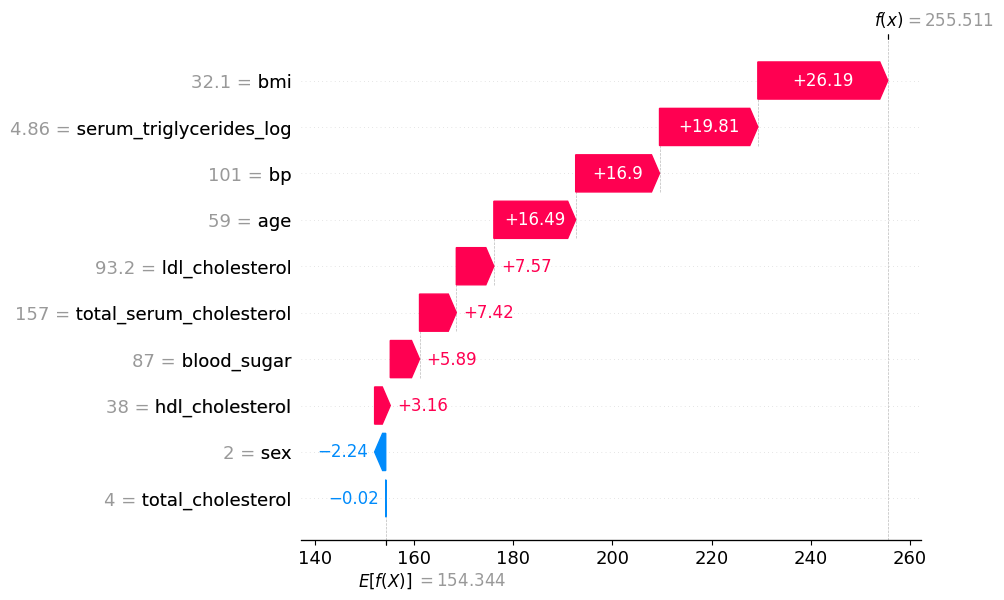

In [31]:
# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[0])

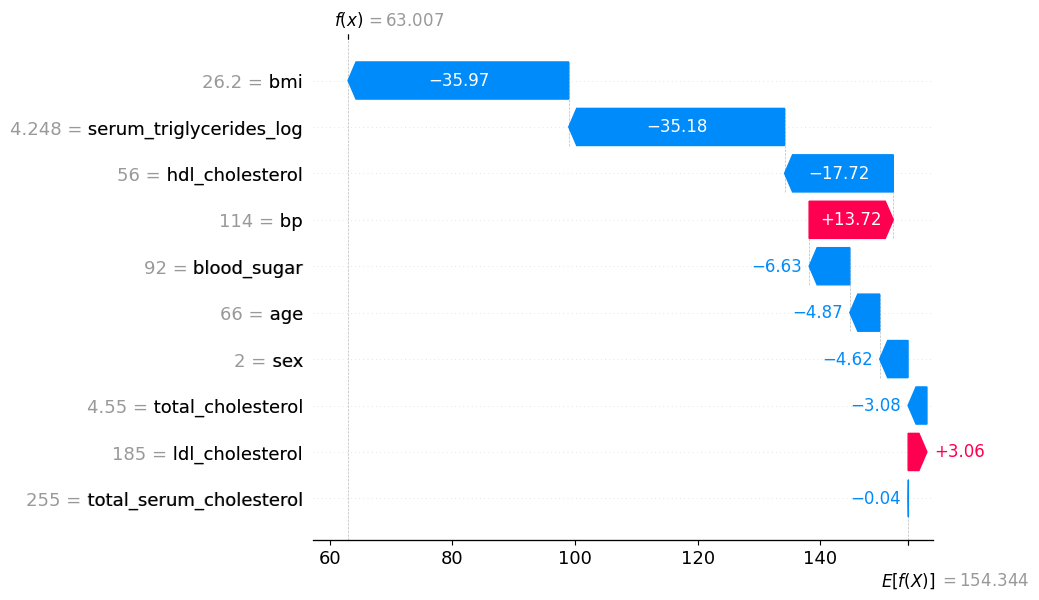

In [32]:
# visualize a later prediction's explanation
shap.plots.waterfall(shap_values[7])

## Force plots

In [33]:
# visualize the first prediction's explanation with a force plot
shap.plots.force(shap_values[0])

In [34]:
# visualize all the predictions
shap.plots.force(shap_values)

## Dependence Plots

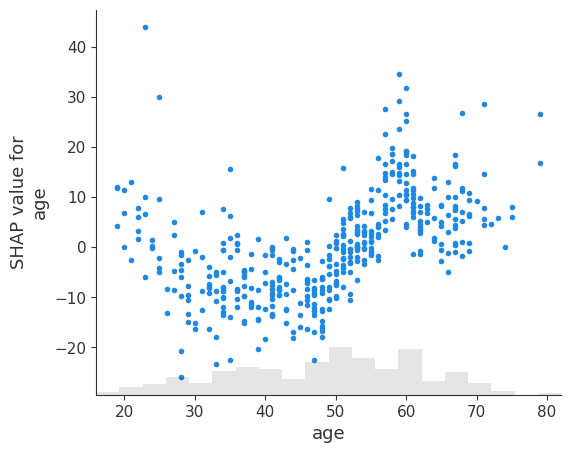

In [35]:
# create a dependence scatter plot to show the effect of a single feature across the whole dataset
shap.plots.scatter(shap_values[:, "age"])

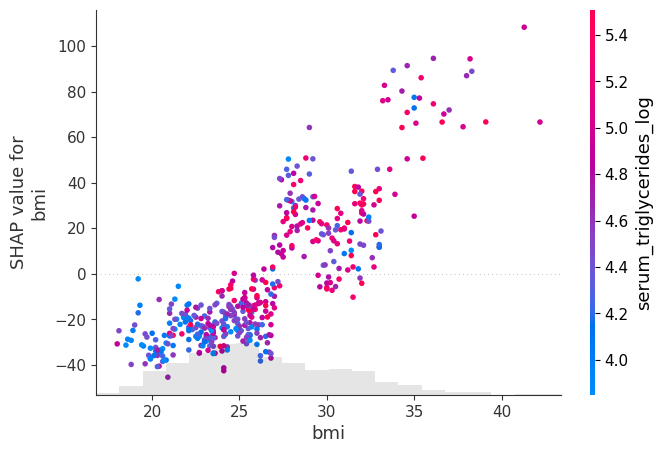

In [36]:
# create a dependence scatter plot to show the effect of a single feature across the whole dataset
shap.plots.scatter(shap_values[:, "bmi"], color=shap_values)

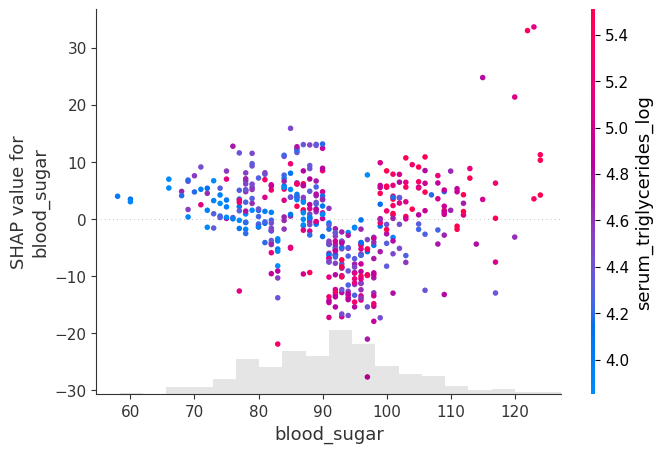

In [37]:
# create a dependence scatter plot to show the effect of a single feature across the whole dataset
shap.plots.scatter(shap_values[:, "blood_sugar"], color=shap_values)

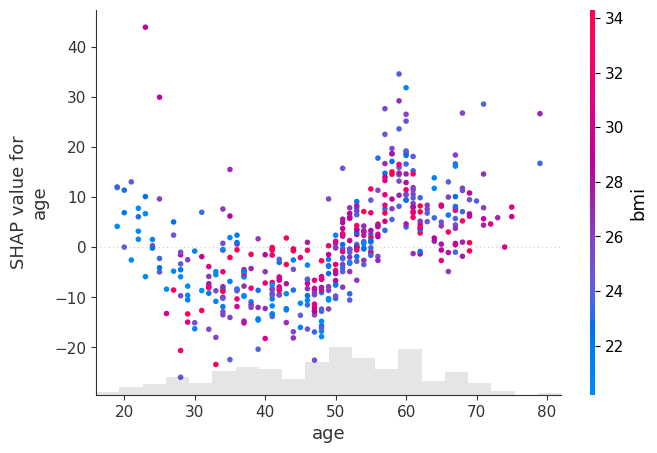

In [38]:
shap.plots.scatter(shap_values[:, "age"], color=shap_values[:, "bmi"])

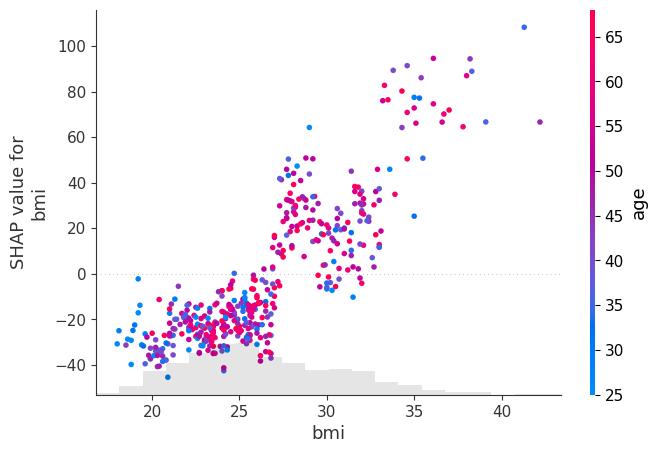

In [39]:
shap.plots.scatter(shap_values[:, "bmi"], color=shap_values[:, "age"])

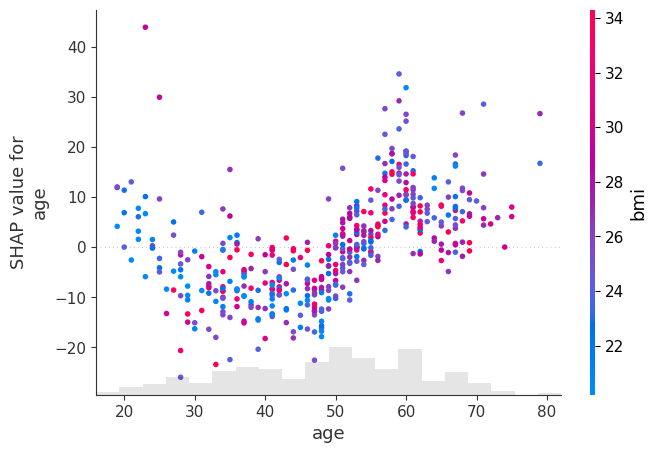

In [40]:
shap.plots.scatter(shap_values[:, "age"], color=shap_values[:, "bmi"])

## Beeswarm

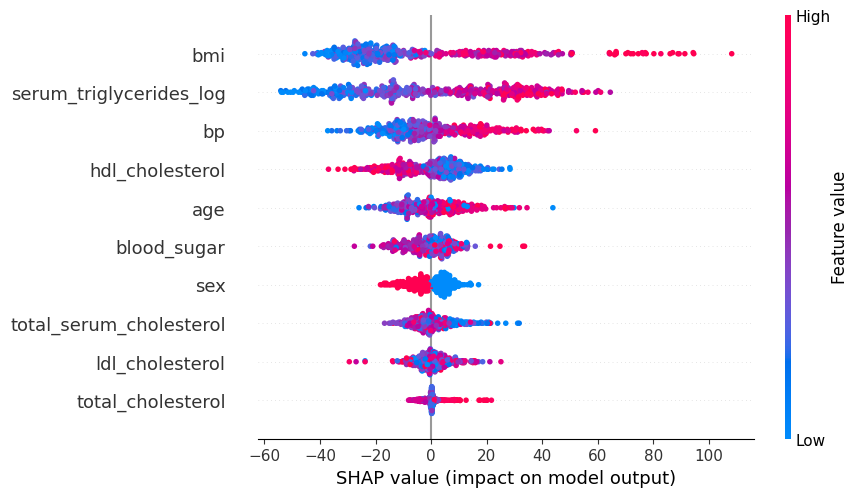

In [41]:
# summarize the effects of all the features
shap.plots.beeswarm(shap_values)

## Violin

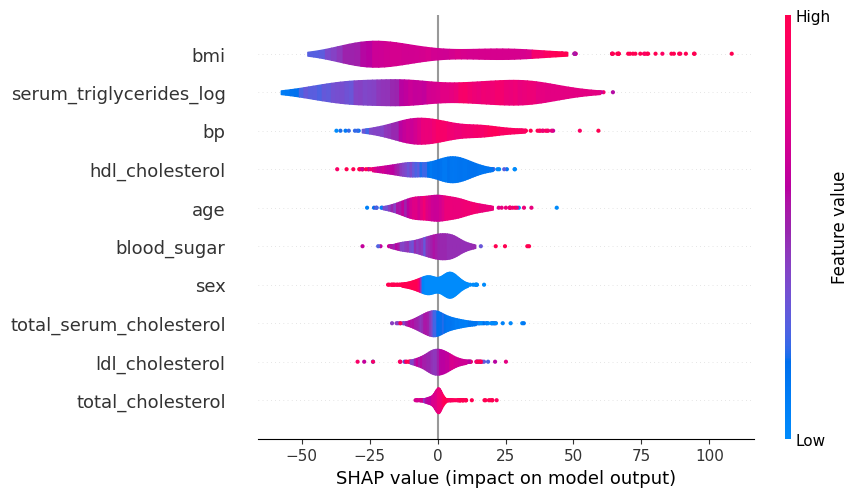

In [42]:
# summarize the effects of all the features
shap.plots.violin(shap_values)

## Bar

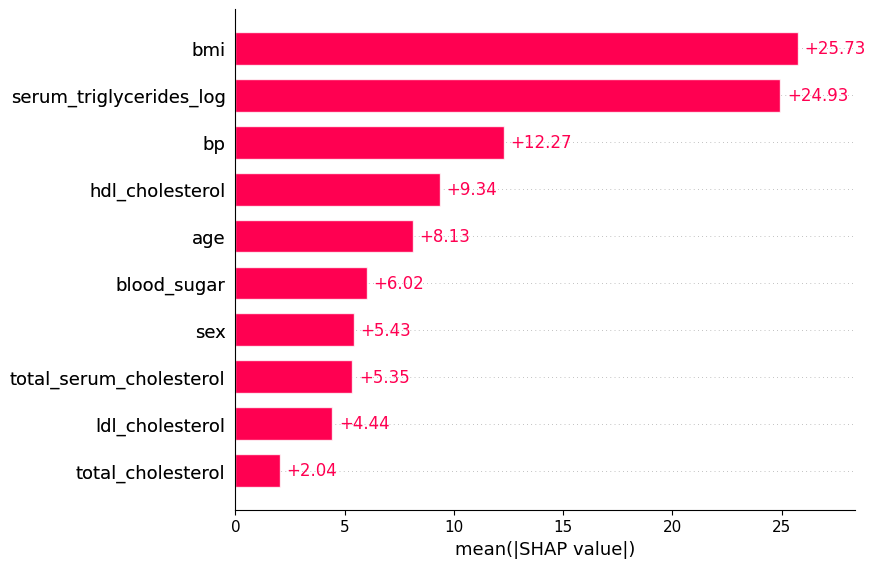

In [43]:
shap.plots.bar(shap_values)

### Splitting by cohorts

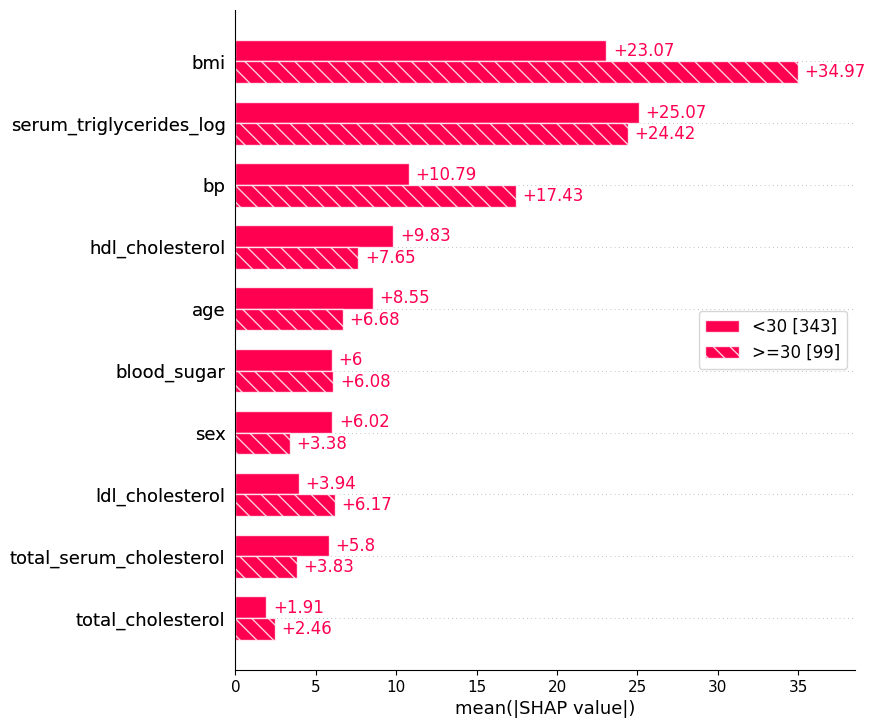

In [45]:
bmi_category = ["<30" if shap_values[i, "bmi"].data < 30 else ">=30" for i in range(shap_values.shape[0])]
shap.plots.bar(shap_values.cohorts(bmi_category).abs.mean(0))

### Automatic cohort splitting

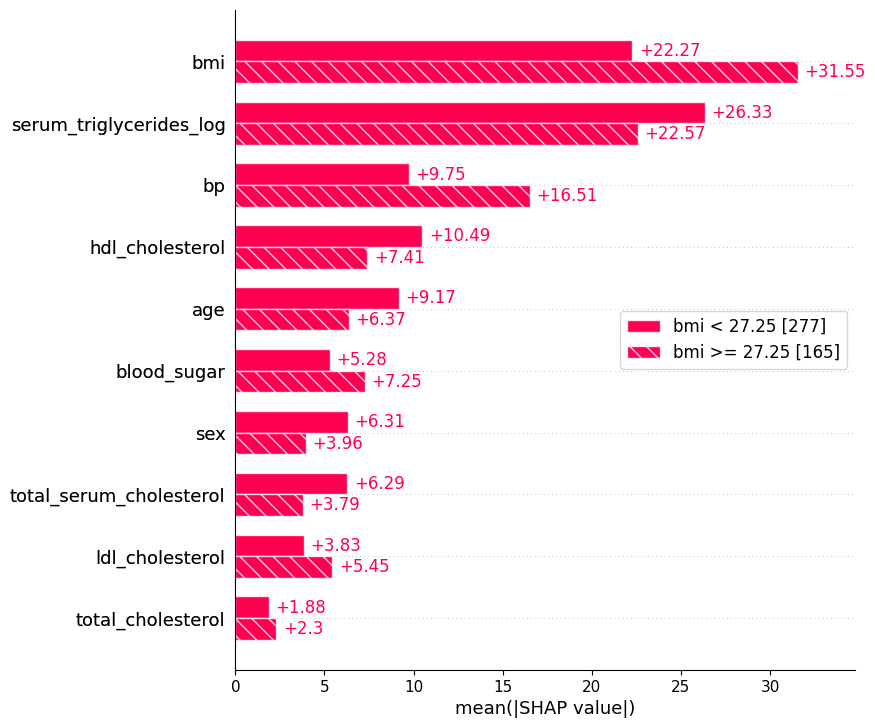

In [57]:
shap.plots.bar(shap_values.cohorts(2).abs.mean(0))

Plot the bars for an individual.

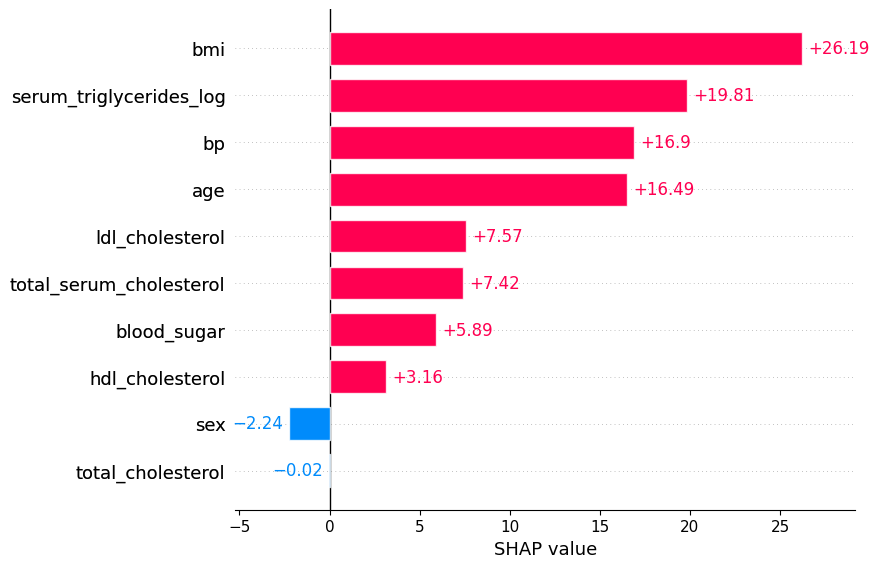

In [46]:
shap.plots.bar(shap_values[0])

## Heatmap

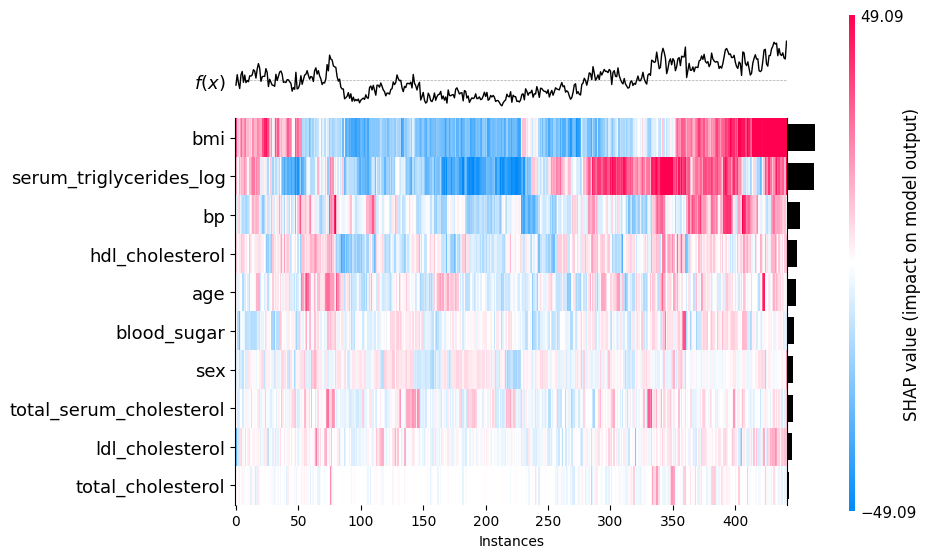

In [47]:
shap.plots.heatmap(shap_values)

## Decision

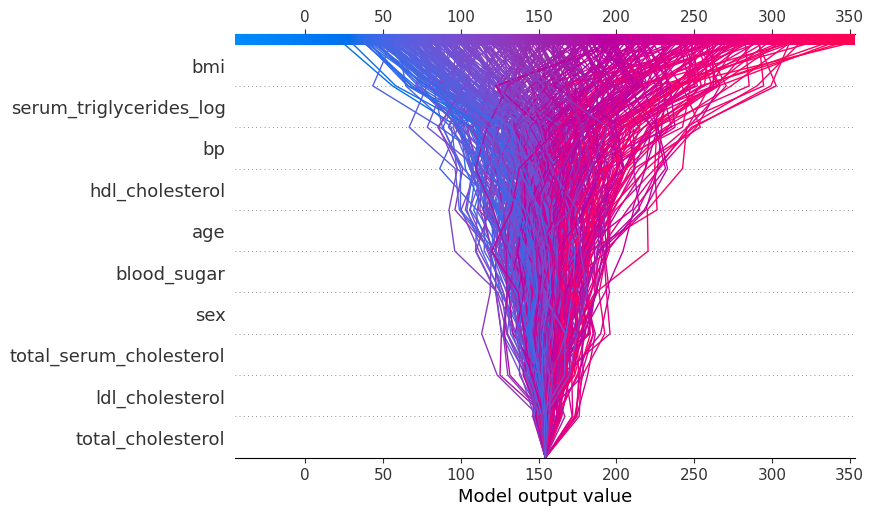

In [53]:
shap.plots.decision(
    explainer.expected_value,
    explainer.shap_values(X),
    feature_names=X.columns.tolist()
    )

### Explanation plot for individual

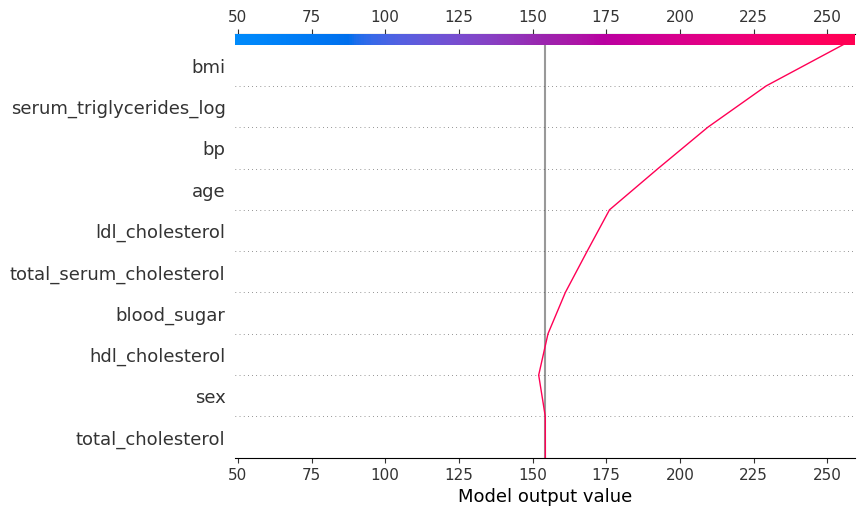

In [58]:
shap.plots.decision(
    explainer.expected_value,
    explainer.shap_values(X)[0],
    feature_names=X.columns.tolist()
    )

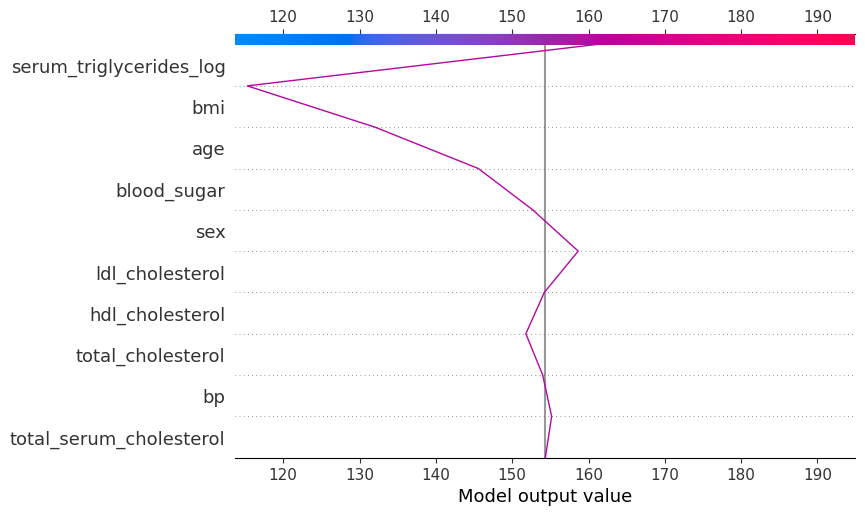

In [61]:
shap.plots.decision(
    explainer.expected_value,
    explainer.shap_values(X)[125],
    feature_names=X.columns.tolist()
    )

## Group Difference

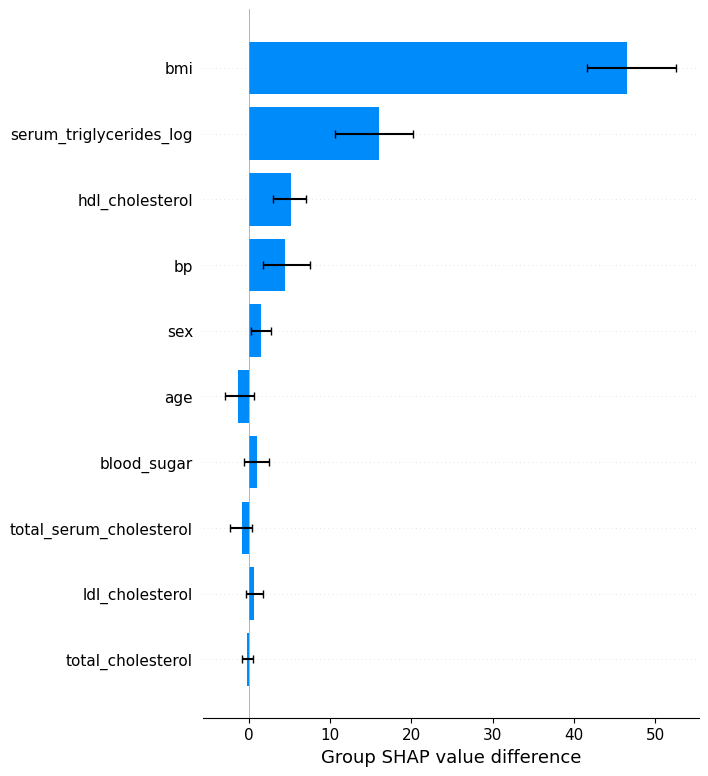

In [68]:
bmi_category_obese = np.array([False if shap_values[i, "bmi"].data < 30 else True for i in range(shap_values.shape[0])])
# bmi_category_obese
shap.plots.group_difference(shap_values_numeric, bmi_category_obese, feature_names=X.columns.tolist())

## Modifying plots

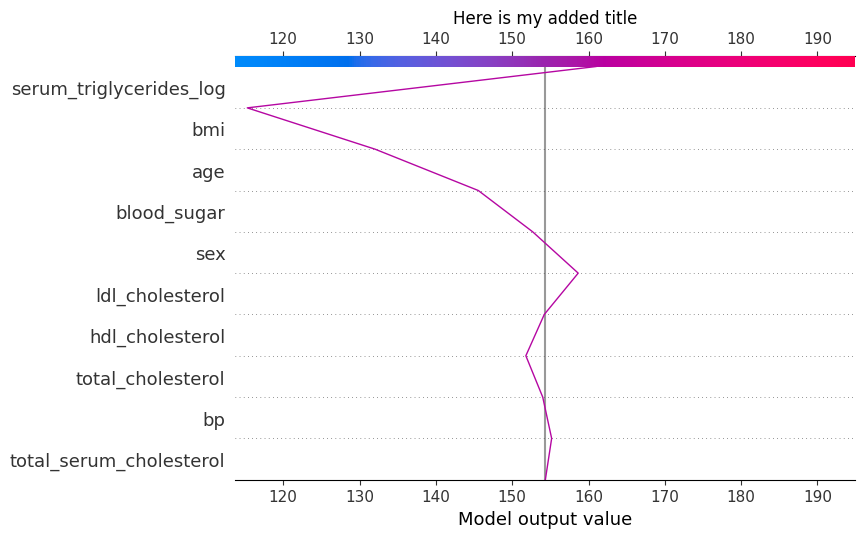

In [63]:
shap.plots.decision(
    explainer.expected_value,
    explainer.shap_values(X)[125],
    feature_names=X.columns.tolist(),
    show=False ## NEW
    )

plt.gcf() ## NEW

ax = plt.title("Here is my added title") ## NEW

## Subplots

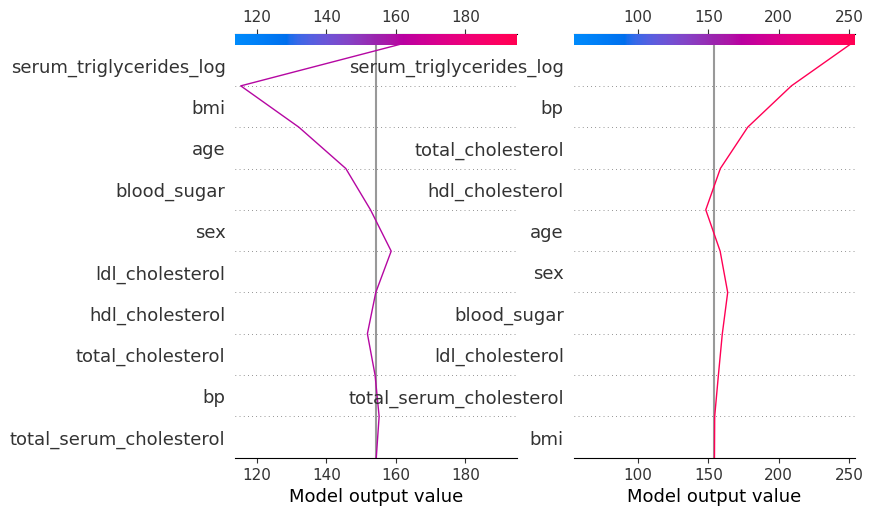

In [91]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15,10)) ## NEW

# sca is 'set current axis'
# ensures next plot is put onto the axis we specify here - our first
# of the two subplots
plt.sca(ax1) ## NEW
shap.plots.decision(
    explainer.expected_value,
    explainer.shap_values(X)[125],
    feature_names=X.columns.tolist(),
    show=False ## NEW
    )

# Change to the second axis
plt.sca(ax2) ## NEW
shap.plots.decision(
    explainer.expected_value,
    explainer.shap_values(X)[15],
    feature_names=X.columns.tolist(),
    show=False ## NEW
    )
